# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Herly Riyanto Hidayat
- **Email:** herlynjjd@gmail.com
- **ID Dicoding:** herlyryanth

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan rental sepeda dalam dua tahun terakhir?
- Di musim apa saja sepeda paling banyak dan paling sedikit dirental?
- Berapa rata-rata sepeda yang dirental dengan pengaruh dari tiap cuaca?
- Pada jam berapa penyewaan sepeda paling banyak terjadi pada hari kerja dan hari libur?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Import data day.csv ke variabel day_df

In [2]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Import daya hour.csv ke variabel hour_df

In [3]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data day dan hour memuat data penyewaan sepeda dari tahun 2011 - 2012
- Tabel day dan hour memiliki kesamaan kolom, perbedaannya hanya pada hour yang memiliki kolom hr untuk melihat jam di satu hari dari jam 00.00 - 23.00

### Assessing Data

Menilai day_df

In [4]:
day_df.info() # mengecek tipe data day_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
day_df.isna().sum() # mengecek nila null atau nan 

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
day_df.duplicated().sum() # mengecek duplikasi data

np.int64(0)

In [7]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai hour_df

In [8]:
hour_df.info() # mengecek tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hour_df.isna().sum() # mengecek nilai null atau nan

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
hour_df.duplicated().sum() # mengecek duplikasi nilai

np.int64(0)

In [11]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dari kedua tabel baik itu day dan hour terdapat kesalahan tipe data pada kolom dteday (object yang seharusnya datetime jika dilihat dari output value kolom)
- Untuk duplikasi data dari kedua tabel aman karena bernilai 0
- Kedua tabel memiliki 90% kesamaan kolom, yang membedakan hanya tabel hour memiliki kolom hr yang berarti hour (jam)

### Cleaning Data

Membersihkan day_df

In [12]:
# Merubah penamaan kolom, agar lebih mudah dipahami dan dibaca
day_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'weathersit' : 'weather',
    'cnt' : 'total_rent',
    'casual' : 'unregistered'
}, inplace=True)

day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,unregistered,registered,total_rent
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [13]:
# Meubah tipe data untuk menyesuaikan value dari tiap kolom sesuai cell selanjutnya

# Meubah tipe data kolom date(object ke datetime)
day_df.date = pd.to_datetime(day_df.date)

# Meubah tipe data kolom ke category
day_df.season = day_df.season.astype('category')
day_df.year = day_df.year.astype('category')
day_df.month = day_df.month.astype('category')
day_df.holiday = day_df.holiday.astype('category')
day_df.workingday = day_df.workingday.astype('category')
day_df.weather = day_df.weather.astype('category')

# Data type pada column date sudah diubah menjadi datetime64[ns]. 
# Beberapa kolom dengan tipe data object dan int64 diubah menjadi category karena merupakan data dengan nilai yang berulang sehingga dapat menghemat memori dan meningkatkan efisiensi eksekusi program

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   date          731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    int64         
 7   workingday    731 non-null    category      
 8   weather       731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  unregistered  731 non-null    int64         
 14  registered    731 non-null    int64         
 15  total_rent    731 non-null    int64     

In [14]:
# Mapping kolom untuk mempermudah analisa data

# Mapping kolom season
mapping_seasons = {
    1: 'Springer', 2: 'Summer',
    3: 'Fall', 4: 'Winter'
}
day_df.season = day_df.season.map(mapping_seasons)

# Mapping kolom tahun
mapping_years = {0: 2011, 1: 2012}
day_df.year = day_df.year.map(mapping_years)

# Mapping kolom bulan
mapping_month = {
    1: 'Jan', 2: 'Feb', 3: 'Mar',
    4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep',
    10: 'Oct', 11: 'Nov', 12: 'Dec'   
}
day_df.month = day_df.month.map(mapping_month)

# Mapping kolom weather
mapping_weathers = {
    1: 'Clear', 2: 'Mist',
    3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'
}
day_df.weather = day_df.weather.map(mapping_weathers)


day_df.head()


,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,unregistered,registered,total_rent
0,1,2011-01-01,Springer,2011,Jan,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,Jan,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,Jan,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,Jan,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,Jan,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Membersihkan hour_df

In [15]:
# Merubah penamaan kolom, agar lebih mudah dipahami dan dibaca

hour_df.rename(columns={
    'dteday' : 'date',
    'yr' : 'year',
    'mnth' : 'month',
    'hr' : 'hour',
    'weathersit' : 'weather',
    'cnt' : 'total_rent',
    'casual' : 'unregistered'
}, inplace=True)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,unregistered,registered,total_rent
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [16]:
# Meubah tipe data untuk menyesuaikan value dari tiap kolom sesuai cell selanjutnya

# Meubah tipe data kolom ke datetime
hour_df.date = pd.to_datetime(hour_df.date)

# Merubah tipe data kolom ke category
hour_df.season = hour_df.season.astype('category')
hour_df.year = hour_df.year.astype('category')
hour_df.month = hour_df.month.astype('category')
hour_df.holiday = hour_df.holiday.astype('category')
hour_df.workingday = hour_df.workingday.astype('category')
hour_df.weather = hour_df.weather.astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant       731 non-null    int64         
 1   date          731 non-null    datetime64[ns]
 2   season        731 non-null    category      
 3   year          731 non-null    category      
 4   month         731 non-null    category      
 5   holiday       731 non-null    category      
 6   weekday       731 non-null    int64         
 7   workingday    731 non-null    category      
 8   weather       731 non-null    category      
 9   temp          731 non-null    float64       
 10  atemp         731 non-null    float64       
 11  hum           731 non-null    float64       
 12  windspeed     731 non-null    float64       
 13  unregistered  731 non-null    int64         
 14  registered    731 non-null    int64         
 15  total_rent    731 non-null    int64     

In [17]:
# Mapping kolom untuk mempermudah analisa data
# variabel mapping diambil dari cell ketika mapping day_df

hour_df.season = hour_df.season.map(mapping_seasons)
hour_df.year = hour_df.year.map(mapping_years)
hour_df.month = hour_df.month.map(mapping_month)
hour_df.weather = hour_df.weather.map(mapping_weathers)

hour_df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,unregistered,registered,total_rent
0,1,2011-01-01,Springer,2011,Jan,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,Jan,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,Jan,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,Jan,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,Jan,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dalam cleaning data ini, saya berfokus pada perubahan nama kolom, merubah tipe data tiap kolom, dan melakukan re-value untuk tiap kolom yang saya rubah tipe datanya, kecuali kolom date (sebelumnya dteday)
- Pemilihan tipe data sangat amat penting untuk proses analisa dan manajemen memori perangkat keras

## Exploratory Data Analysis (EDA)

### Explore tabel day_df

Explore jumlah total rental sepeda dalam 2 tahun terakhir

In [18]:
day_df.groupby(by=['year', 'month']).agg({
    'total_rent': ['sum', 'max', 'min', 'mean']
})

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10500\1509087900.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by=['year', 'month']).agg({


total_rent                         
                  sum   max   min         mean
year month                                    
2011 Jan        38189  1985   431  1231.903226
     Feb        48215  2927  1005  1721.964286
     Mar        64045  3239   605  2065.967742
     Apr        94870  5312   795  3162.333333
     May       135821  5805  2633  4381.322581
     Jun       143512  5515  3767  4783.733333
     Jul       141341  6043  3285  4559.387097
     Aug       136691  5895  1115  4409.387097
     Sep       127418  5423  1842  4247.266667
     Oct       123511  5511   627  3984.225806
     Nov       102167  4486  1495  3405.566667
     Dec        87323  3940   705  2816.870968
2012 Jan        96744  4521  1301  3120.774194
     Feb       103137  5062  1529  3556.448276
     Mar       164875  8362  3194  5318.548387
     Apr       174224  7460  1027  5807.466667
     May       195865  8294  2843  6318.225806
     Jun       202830  8120  4127  6761.000000
     Jul       203607  8173  4459  6567.967742
     Aug       214503  7865  4549  6919.451613
     Sep       218573  8714  4073  7285.766667
     Oct       198841  8156    22  6414.225806
     Nov       152664  6852  2277  5088.800000
     Dec       123713  6606   441  3990.741935

**Insight:**
- Pada tahun 2011, total penyewaan rental tertinggi pada bulan Juni yaitu 143512. Untuk penyewaan terendah pada bulan Januari yaitu 38189
- Pada tahun 2012, total penyewaan rental tertinggi pada bulan September yaitu 218573. Untuk penyewaan terendah pada bulan Januari yaitu 96744
- Dari hal tersebut dapat disimpulkan bahwa, penyewaan rental sepeda terendah tiap tahun di bulan Januari dalm 2 tahun terakhir

Explore penyewaan rental sepeda tiap musim

In [19]:
day_df.groupby(by='season').agg({
    'total_rent': ['sum', 'max', 'min', 'mean'],
})

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10500\4274243821.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='season').agg({


total_rent                         
                sum   max   min         mean
season                                      
Springer     471348  7836   431  2604.132597
Summer       918589  8362   795  4992.331522
Fall        1061129  8714  1115  5644.303191
Winter       841613  8555    22  4728.162921

**Insight:**
- Dari pivot table tersebut untuk penyewaan rental sepeda terbanyak ada pada musim Fall dengan penyewaan 1061129
- Untuk penyewaan rental paling sedikit di musim Spring dengan penyewaan 471348 

Explore pengaruh cuaca terhadap penyewaan rental sepeda

In [20]:
day_df.groupby(by='weather').agg({
    'total_rent': ['sum', 'max', 'min', 'mean']
})

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10500\3572917823.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by='weather').agg({


total_rent                        
                       sum   max  min         mean
weather                                           
Clear              2257952  8714  431  4876.786177
Mist                996858  8362  605  4035.862348
Light Rain/Snow      37869  4639   22  1803.285714

In [31]:
day_df.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,unregistered,registered,total_rent,year_month,total_sum
0,1,2011-01-01,Springer,2011,Jan,0,6,0,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985,Jan 2011,38189
1,2,2011-01-02,Springer,2011,Jan,0,0,0,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801,Jan 2011,38189
2,3,2011-01-03,Springer,2011,Jan,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Jan 2011,38189
3,4,2011-01-04,Springer,2011,Jan,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Jan 2011,38189
4,5,2011-01-05,Springer,2011,Jan,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Jan 2011,38189


**Insight:**
- Dari pivot table tersebut, pengaruh cuaca terhadap penyewaan rental sangat berpengaruh
- Untuk cuaca yang Clear (cerah), penyewaan rental sepeda sangatlah tinggi di angka 2257952
- Sementara untuk cuaca Light Rain/Snow, memiliki penyewaan rental sepeda yang sangat rendah di angka 37869 

### Explore hour_df

Explore total penyewaan rental sepeda pada hari kerja (weekday)

In [21]:
filter_workingday = hour_df[(hour_df.workingday == 1)]
hour_df_workingday = filter_workingday.groupby(by='hour').agg({
    'total_rent': ['sum', 'max', 'min', 'mean']
})
hour_df_workingday.columns = hour_df_workingday.columns.droplevel(0)
hour_df_workingday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hour,,,,
17,262120,976,26,525.290581
18,245129,977,26,492.226908
8,236595,839,31,477.006048
19,173504,743,18,348.401606
16,146268,634,13,293.122244
7,144144,596,18,290.612903
20,124360,567,23,249.718876
9,119793,426,23,241.518145
15,100263,601,13,201.331325


**Insight:**
- Dari pivot table tersebut, bisa dilihat bahwa penyewaan rental terbanyak pada hari biasa (hari kerja) terjadi pada waktu tertentu
- Waktu tersebut adalah saat pulang kerja atau akhir hari berkisar antara jam 15.00 - 20.00 waktu setempat
- Dan Waktu berangkat kerja atau awal hari berkisar antara jam 07.00 - 09.00 waktu setempat

Explore total penyewaan rental sepeda pada hari libur (weekend)

In [22]:
filter_holiday = hour_df[(hour_df.holiday == 1)|(hour_df.workingday == 0)]
hour_df_holiday = filter_holiday.groupby(by='hour').agg({
    'total_rent': ['sum', 'max', 'min', 'mean']
})
hour_df_holiday.columns = hour_df_holiday.columns.droplevel(0)
hour_df_holiday.sort_values(by='sum', ascending=False)

,sum,max,min,mean
hour,,,,
13,86101,760,30,372.731602
12,84606,776,32,366.259740
14,84233,750,23,364.645022
15,82886,750,7,358.813853
16,81480,783,11,352.727273
17,74740,731,15,323.549784
11,72838,663,27,315.316017
18,64643,676,23,281.056522
10,59115,539,12,255.909091


**Insight:**
- Dari pivot table tersebut, bisa dilihat bahwa penyewaan rental sepeda bisa dibilang bervariasi
- Untuk penyewaan sepeda terbanyak itu berkisar diantara jam 11.00 - 20.00 waktu setempat

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan rental sepeda dalam dua tahun terakhir?

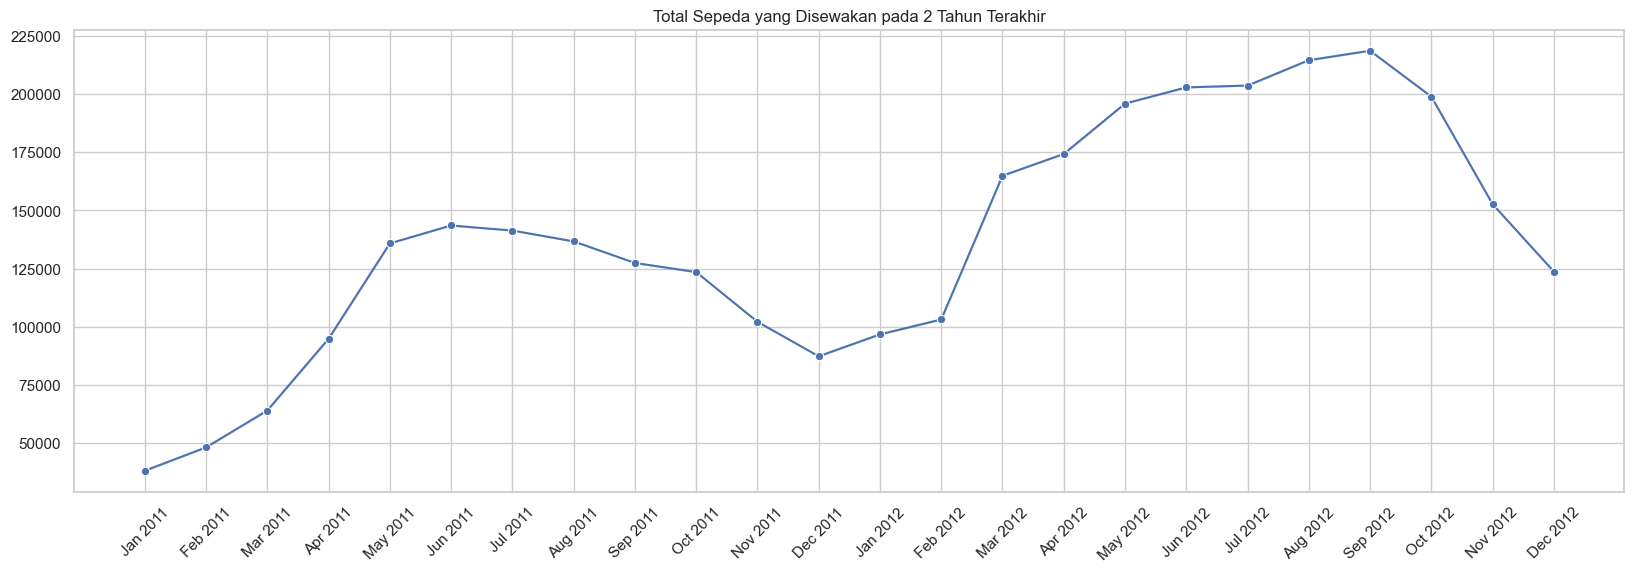

In [23]:
# Menggganti datatype untuk merge kolom
plot_month = day_df.month.astype(str)
plot_year = day_df.year.astype(str)

# Merging kolom month dan year untuk plot ke kolom baru
day_df["year_month"] = plot_month + ' ' + plot_year

# Membuat kolom berisi sum data kolom 'total' untuk setiap 'year_month'
day_df["total_sum"] = day_df.groupby("year_month").total_rent.transform('sum')

# Membuat line chart karena untuk melihat performa penyewaan dalam dua tahun terakhir
plt.figure(figsize=(20, 6))
sns.set(style='whitegrid')
sns.lineplot(
    data=day_df, 
    x='year_month', 
    y='total_sum',  
    marker='o'
)
plt.title("Total Sepeda yang Disewakan pada 2 Tahun Terakhir")
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2: Di musim apa saja sepeda paling banyak dan paling sedikit dirental?

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10500\3496583439.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_season = day_df.groupby('season')[['registered', 'unregistered']].sum().reset_index()


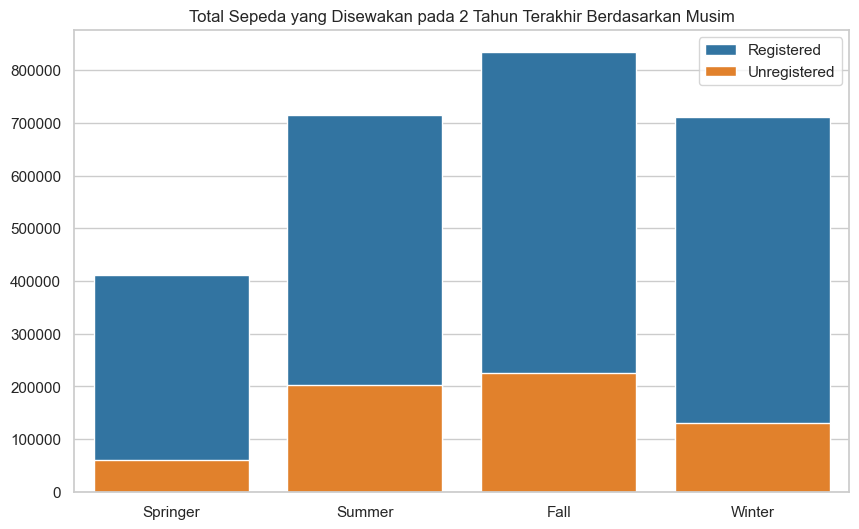

In [24]:
# Membuat variabel total data pelanggan registered dan kasual setiap season
plot_season = day_df.groupby('season')[['registered', 'unregistered']].sum().reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_season, 
    x='season', 
    y='registered', 
    label='Registered', 
    color='tab:blue'
)
sns.barplot(
    data=plot_season, 
    x='season', 
    y='unregistered', 
    label='Unregistered', 
    color='tab:orange'
)
plt.title('Total Sepeda yang Disewakan pada 2 Tahun Terakhir Berdasarkan Musim')
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

### Pertanyaan 3: Berapa rata-rata sepeda yang dirental dengan pengaruh dari tiap cuaca?

C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_10500\3149897660.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_weather = day_df.groupby(by='weather').agg({


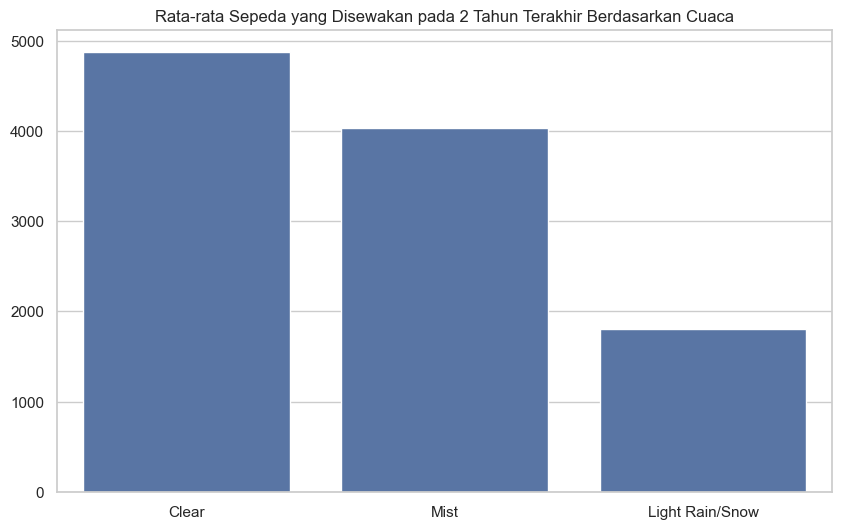

In [25]:
# Membuat variabel total data pelanggan berdasarkan cuaca
plot_weather = day_df.groupby(by='weather').agg({
    'total_rent': 'mean'
}).reset_index()

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    data=plot_weather, 
    x='weather', 
    y='total_rent'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Rata-rata Sepeda yang Disewakan pada 2 Tahun Terakhir Berdasarkan Cuaca')
plt.show()

### Pertanyaan 4: Pada jam berapa penyewaan sepeda paling banyak terjadi pada hari kerja dan hari libur?

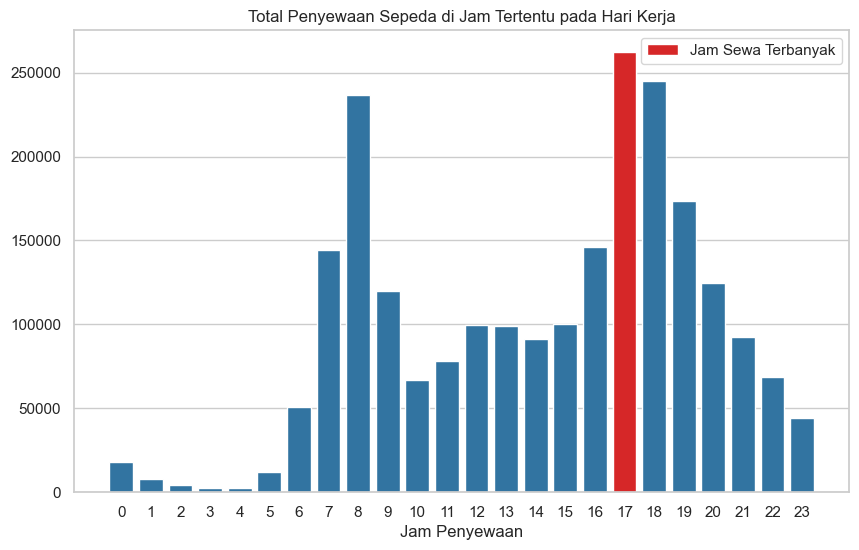

In [26]:
# Membuat variabel total data pelanggan berdasarkan jam pada hari kerja
plot_hour_workingday = filter_workingday.groupby(by='hour').agg({
    'total_rent': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

# Menentukan indeks kolom dengan total terbesar
max_col = plot_hour_workingday['total_rent'].idxmax()

# Membuat bar plot
sns.barplot(
    data=plot_hour_workingday, 
    x='hour', 
    y='total_rent',
    color='tab:blue'
)
plt.bar(max_col, plot_hour_workingday.loc[max_col, 'total_rent'], color='tab:red', label='Jam Sewa Terbanyak')

plt.title("Total Penyewaan Sepeda di Jam Tertentu pada Hari Kerja")
plt.xlabel('Jam Penyewaan')
plt.ylabel(None)
plt.legend()
plt.show()

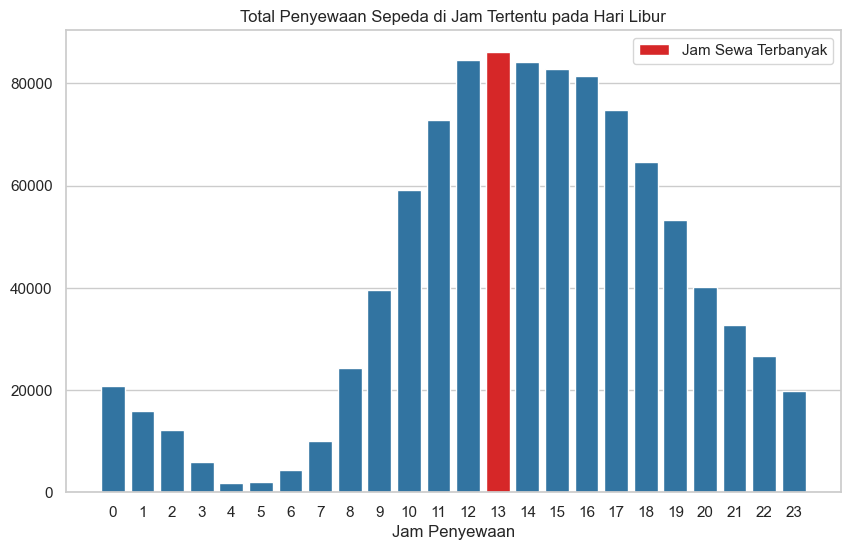

In [27]:
# Membuat variabel total data pelanggan berdasarkan jam pada hari libur
plot_hour_holiday = filter_holiday.groupby(by='hour').agg({
    'total_rent': 'sum'
}).reset_index()

plt.figure(figsize=(10, 6))

# Menentukan indeks kolom dengan total terbesar
max_col = plot_hour_holiday['total_rent'].idxmax()

# Membuat bar plot
sns.barplot(
    data=plot_hour_holiday, 
    x='hour', 
    y='total_rent',
    color='tab:blue'
)
plt.bar(max_col, plot_hour_holiday.loc[max_col, 'total_rent'], color='tab:red', label='Jam Sewa Terbanyak')

plt.title("Total Penyewaan Sepeda di Jam Tertentu pada Hari Libur")
plt.xlabel('Jam Penyewaan')
plt.ylabel(None)
plt.legend()
plt.show()

**Insight:**
- Dari pertanyaan pertama, bisa dilihat bahwa penyewaan sepeda itu memiliki pola kenaikan yang tarjadi pada awal tahun ke Quarter 2 dari Januari sampai September di 2011 maupun di tahun 2012. Lalu pola penurunan terjadi pada akhir tahun, yaitu Oktober sampai December di tahun 2011 maupun di tahun 2012. Hal ini terjadi kemungkinan karena adanya pengaruh dari musim
- Untuk pertanyaan kedua, ini membuktikan bahwa pengaruh dari musim untuk penyewaan sepeda itu sangatlah nyata. Bisa dilihat penyewaan terbanyak itu terjadi pada musim Fall baik itu pelanggan registered maupun casual dengan pencapaian lebih dari 800000 penyewaan. Lalu untuk penyewaan terendah itu terjadi pada musim Spring dengan pencapaian kurang lebih 50% (persen) dari penyewaan terbanyak atau tertinggi
- Dari pertanyaan ketiga bisa dilihat bahwa, cuaca itu juga berpengaruh pada penyewaan sepeda. Dilihar dari grafik tersebut, rata-rata penyewaan sepeda itu terjadi ketika cuaca sedang Clear (cerah), sedangkan ketika cuaca sedang Light Rain/Snow (hujan ringan/bersalju), rata-rata penyewaan sepeda berkurang
- Terakhir untuk pertanyaan keempat, penyewaan sepeda tertinggi pada hari kerja terjadi pada jam pulang kerja, yaitu di jam 17.00 waktu setempat. Lalu untuk penyewaan tertinggi di hari libur, itu terjadi di jam 13.00 waktu setempat

## Analisis Lanjutan (Opsional)

### RFM Analysis

In [28]:
rfm_df = hour_df.groupby(by="hour", as_index=False).agg({
    "date": "max",
    "instant": "nunique",
    "total_rent": "sum"
})

# Mengganti nama kolom
rfm_df.columns = ["hour", "last_order_date", "order_count", "revenue"]

# Membuat vairabel untuk menampung perhitungan recency per hari
rfm_df["last_order_date"] = rfm_df["last_order_date"].dt.date
recent_date = hour_df["date"].dt.date.max()
rfm_df["recency"] = rfm_df["last_order_date"].apply(lambda x: (recent_date - x).days)

# Drop kolom 'last_order_date'
rfm_df.drop("last_order_date", axis=1, inplace=True)

rfm_df.head()

,hour,order_count,revenue,recency
0,0,726,39130,0
1,1,724,24164,0
2,2,715,16352,0
3,3,697,8174,0
4,4,697,4428,0


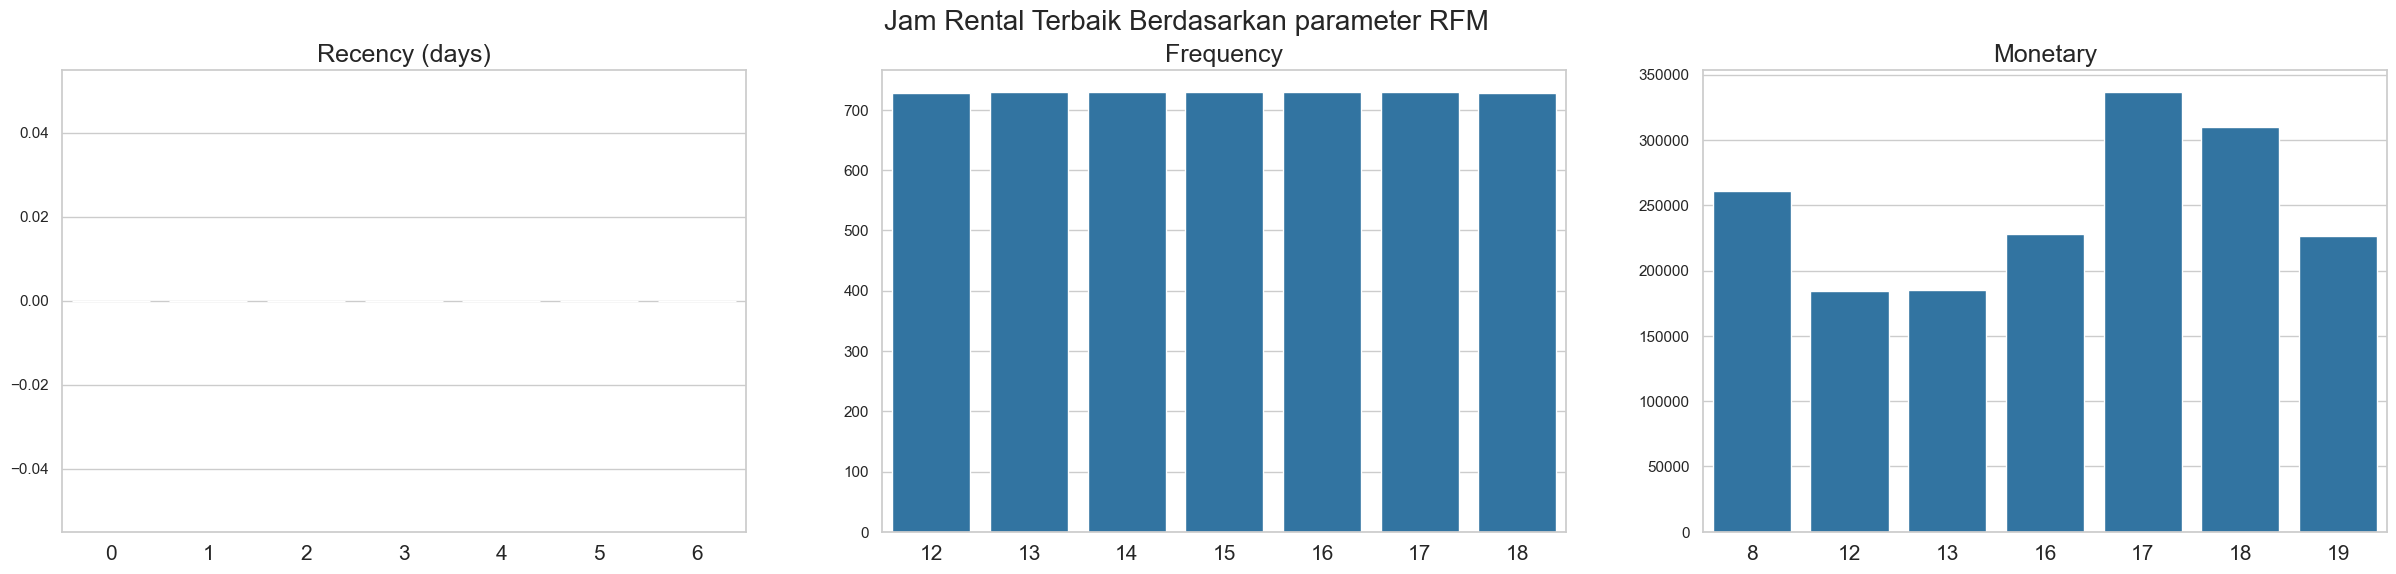

In [29]:
# Membuat variabel untuk menampung nilai RFM
top_recency = rfm_df.sort_values(by="recency", ascending=True).head(7)
top_frequency = rfm_df.sort_values(by="order_count", ascending=False).head(7)
top_monetary = rfm_df.sort_values(by="revenue", ascending=False).head(7)

# Membuat bar plot RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Plot untuk Recency
sns.barplot(
    data=top_recency, 
    x="hour", 
    y="recency",
    color='tab:blue',
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

# Plot untuk Frequency
sns.barplot(
    data=top_frequency,
    x="hour",
    y="order_count", 
    color='tab:blue',
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Plot untuk Monetary
sns.barplot(
    data=top_monetary, 
    x="hour", 
    y="revenue", 
    color='tab:blue',
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Jam Rental Terbaik Berdasarkan parameter RFM", fontsize=20)
plt.show()

RFM Analysis disini digunakan untuk mencari data top 7 hours berdasarkan pada 3 kategori yang berbeda dengan memanfaatkan nilai pada kolom jam.
- Kategori Recency didasarkan pada transaksi terakhir kali yang dilakukan.
- Kategori Frekuensi menunjukkan seberapa sering terjadi transaksi berdasarkan jam.
- Kategori Monetary menunjukkan seberapa banyak transaksi yang terjadi pada jam tertentu.

In [30]:
hour_df.to_csv("main_data.csv", index=False)

## Conclusion

- Kesimpulan pertama: pola kenaikan terhadap penyewaan sepeda terjadi pada Quarter pertama sampai Quarter kedua baik pada tahun 2011 maupun 2012, yaitu pada bulan Januari sampai September. Sedangkan pola penurunan terjadi di akhir tahun atau Quarter ketiga, yaitu pada bulan Oktober sampai Desember
- Kesimpulan kedua: pengaruh dari 4 musim untuk pelanggan melakukan penyewaan sepeda sangatlah terlihat, bisa dilihat penyewaan tertinggi pada musim Fall, dan penyewaan terendah pada musim Spring
- Kesimpulan ketiga: selain pengaruh dari musim, pengaruh cuaca juga sangatlah mempengaruhi pola penyewaan sepeda. Penyewaan sepeda sering terjadi pada cuaca yang cerah atau Clear
- Kesimpulan keempat: pada hari kerja penyewaan sepeda lebih cenderung pada jam berangkat kerja dan pulang kerja. Sedangkan ketika hari libur, penyewaan sepeda terjadi secara acak, namun lebih sering ketika waktu mendekati siang hari sampai malam hari